In [101]:
!pip install pandas 
import pandas as pd

In [102]:
df=pd.read_csv(r'C:\Users\tarun\Downloads\more_match_player_feature_matches (1).csv')

C:\Users\tarun\AppData\Local\Temp\ipykernel_24580\1480087257.py:1: DtypeWarning: Columns (27,33,44,50,52,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\tarun\Downloads\more_match_player_feature_matches (1).csv')


In [103]:
df.shape

(672500, 140)

In [959]:
df.columns

Index(['cricinfo_id', 'start_time', 'actual_days', 'adjusted', 'amount',
       'amount_balls', 'amount_name', 'amount_type', 'away_team_id',
       'batting_first_team_id',
       ...
       'totalprecip_mm', 'totalsnow_cm', 'avgvis_km', 'avghumidity',
       'daily_will_it_rain', 'daily_chance_of_rain', 'daily_will_it_snow',
       'daily_chance_of_snow', 'condition', 'uv'],
      dtype='object', length=140)

In [1130]:
df.shape

(672500, 140)

In [1]:
import streamlit
import pandas as pd
import numpy as np
import joblib
import sklearn
import scipy

print("Streamlit version:", streamlit.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Joblib version:", joblib.__version__)
print("scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)

Streamlit version: 1.31.0
Pandas version: 2.0.3
NumPy version: 1.24.3
Joblib version: 1.2.0
scikit-learn version: 1.3.0
SciPy version: 1.11.1


In [75]:
pd.set_option('display.max_columns', None)
df['start_time'] = pd.to_datetime(df['start_time'])
# Assuming your DataFrame is named df
# Replace 'team1_class_id' and 'team2_class_id' with the actual column names in your DataFrame

filtered_df = df[(df['team1_class_id'] == 6) & (df['team2_class_id'] == 6)]

# Now, filtered_df contains only the rows where both 'team1_class_id' and 'team2_class_id' are equal to 6
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'country' with the actual column name in your DataFrame

filtered_df = filtered_df[filtered_df['country_abbreviation'] == 'IND']

# Now, filtered_df contains only the rows where 'country' is equal to 'India'
# Create a mask to filter rows where the year is 2022
# List of years you want to filter
years_to_filter = [2018,2019,2021,2022]

# Create a mask to filter rows where the year is in the list of years_to_filter
mask_years = filtered_df['start_time'].dt.year.isin(years_to_filter)

# Apply the mask to the DataFrame
filtered_df = filtered_df[mask_years]

In [76]:
filtered_df.shape

(17380, 140)

In [104]:
pd.set_option('display.max_columns', None)
df['start_time'] = pd.to_datetime(df['start_time'])
# Assuming your DataFrame is named df
# Replace 'team1_class_id' and 'team2_class_id' with the actual column names in your DataFrame

filtered_df = df[(df['team1_class_id'] == 6) & (df['team2_class_id'] == 6)]

# Now, filtered_df contains only the rows where both 'team1_class_id' and 'team2_class_id' are equal to 6
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'country' with the actual column name in your DataFrame

filtered_df = filtered_df[filtered_df['country_abbreviation'] == 'IND']

# Now, filtered_df contains only the rows where 'country' is equal to 'India'
# Create a mask to filter rows where the year is 2022
# List of years you want to filter
years_to_filter = [2023]

# Create a mask to filter rows where the year is in the list of years_to_filter
mask_years = filtered_df['start_time'].dt.year.isin(years_to_filter)

# Apply the mask to the DataFrame
filtered_df = filtered_df[mask_years]

In [105]:
filtered_df.shape

(5652, 140)

In [792]:
filtered_df['description'].value_counts()

description
Right-hand bat            6520
Left-hand bat             2590
Right-arm offbreak        2186
Right-arm medium          1754
Right-arm fast             882
Legbreak                   660
Slow left-arm orthodox     622
Right-arm fast-medium      616
Legbreak googly            560
Right-arm medium-fast      336
Left-arm fast-medium       244
Left-arm medium            158
Left-arm medium-fast       138
Left-arm wrist-spin         92
Left-arm fast               22
Name: count, dtype: int64

In [886]:
filtered_df.shape

(17380, 140)

In [963]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [106]:
filtered_df['team1_abbreviation'] = filtered_df['team1_abbreviation'].replace('KXIP', 'PBKS')
filtered_df['team2_abbreviation'] = filtered_df['team2_abbreviation'].replace('KXIP', 'PBKS')

In [107]:
filtered_df.shape

(5652, 140)

In [112]:
filtered_df.shape

(5652, 140)

In [80]:
result_df = filtered_df

In [113]:
result_df.shape

(17380, 152)

In [111]:
result_df.columns

Index(['cricinfo_id', 'start_time', 'actual_days', 'adjusted', 'amount',
       'amount_balls', 'amount_name', 'amount_type', 'away_team_id',
       'batting_first_team_id',
       ...
       'Total_Hundreds_Mean', 'Total_Fifties', 'Total_Hundreds',
       'Total_Fours_sum', 'Total_Sixes_sum', 'Total_Fours_mean',
       'Total_Sixes_mean', 'Total_runs', 'Total_runs_mean', 'age'],
      dtype='object', length=152)

In [81]:
# Calculate average strike rate and average balls faced
avg_strike_rate = result_df.groupby('name')['strike_rate'].mean().reset_index(name='Avg_Strike_Rate')
avg_balls_faced = result_df.groupby('name')['balls_faced'].mean().reset_index(name='Avg_Balls_Faced')

# Merge the averages back into the original DataFrame
result_df = pd.merge(result_df, avg_strike_rate, on='name')
result_df = pd.merge(result_df, avg_balls_faced, on='name')

# Display the updated DataFrame
print(result_df.shape)

(17380, 142)


In [124]:
result_df.shape

(17380, 152)

In [125]:
# Select the columns you want to use as constant values
constant_columns = ['Avg_Strike_Rate','Avg_Balls_Faced','Total_Fifties_Mean', 'Total_Hundreds_Mean','Total_Fifties','Total_Hundreds','Total_Fours_sum', 'Total_Sixes_sum', 'Total_Fours_mean', 'Total_Sixes_mean', 'Total_runs', 'Total_runs_mean']

# Create the constant_values dictionary
constant_values = result_df.set_index('name')[constant_columns].to_dict()

# Now, constant_values is a dictionary containing constant values based on player names

In [126]:
len(constant_values)

12

In [127]:
# Create a new DataFrame with names from df2
result = filtered_df.copy()

# Add the constant columns based on the values from constant_values
for col in constant_columns:
    result[col] = result['name'].map(constant_values[col])

# Now, result_df contains the names from df2 and the constant columns
print(result.shape)

(5652, 152)


In [130]:
result.isna().sum()

cricinfo_id           0
start_time            0
actual_days           0
adjusted              0
amount                0
                   ... 
Total_Sixes_sum     850
Total_Fours_mean    850
Total_Sixes_mean    850
Total_runs          850
Total_runs_mean     850
Length: 152, dtype: int64

In [132]:
from datetime import datetime
import numpy as np 
# Assuming 'date_of_birth' is the column with date of birth
result['date_of_birth'] = pd.to_datetime(result['date_of_birth'], errors='coerce')

# Calculate age based on current date
current_date = datetime.now()
result['age'] = np.floor((current_date - result['date_of_birth']).dt.days / 365.25)

# Drop the original 'date_of_birth' column if needed
result.drop(columns=['date_of_birth'], inplace=True)

# Display the resulting DataFrame
print(result.shape)

(5652, 152)


In [133]:
# Assuming these are the columns you want to keep
columns_to_keep =['cricinfo_id','start_time','away_team_id', 'floodlit_name',
       'home_team_id', 'team1_abbreviation', 'team2_abbreviation',
       'batting_position','innings_number',
       'runs','fours','sixes','age',
       'name', 'position','ground_name','avgtemp_c','maxwind_kph','condition',
       'Avg_Balls_Faced','Avg_Strike_Rate','Total_Fifties_Mean','Total_Hundreds_Mean',
       'Total_Fifties','Total_Hundreds','Total_Fours_sum','Total_Sixes_sum','Total_Fours_mean','Total_Sixes_mean','Total_runs','Total_runs_mean']
# Keep only the specified columns in the DataFrame
df_fil = result[columns_to_keep]

# Display the resulting DataFrame
print(df_fil.shape)

(5652, 31)


In [137]:
df_fil.shape

(5652, 31)

In [140]:
df_fil.isna().sum()

cricinfo_id            0
start_time             0
away_team_id           0
floodlit_name          0
home_team_id           0
team1_abbreviation     0
team2_abbreviation     0
batting_position       0
innings_number         0
runs                   0
fours                  0
sixes                  0
age                    0
name                   0
position               0
ground_name            0
avgtemp_c              0
maxwind_kph            0
condition              0
Avg_Balls_Faced        0
Avg_Strike_Rate        0
Total_Fifties_Mean     0
Total_Hundreds_Mean    0
Total_Fifties          0
Total_Hundreds         0
Total_Fours_sum        0
Total_Sixes_sum        0
Total_Fours_mean       0
Total_Sixes_mean       0
Total_runs             0
Total_runs_mean        0
dtype: int64

In [138]:
df_fil.fillna(0,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_24580\42254158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil.fillna(0,inplace=True)


In [139]:
df_fil.to_csv('2023.csv')

In [118]:
len(constant_values)

8

In [ ]:
'Total_Fifties_Mean','Total_Hundreds_Mean','Total_Fifties','Total_Hundreds','Total_Fours_sum','Total_Sixes_sum','Total_Fours_mean','Total_Sixes_mean','Total_runs','Total_runs_mean'

In [82]:
# Calculate total fifties and total hundreds
total_fifties_mean = result_df.groupby('name')['fifty_plus'].mean().reset_index(name='Total_Fifties_Mean')
total_hundreds_mean = result_df.groupby('name')['hundreds'].mean().reset_index(name='Total_Hundreds_Mean')

# Merge the totals back into the original DataFrame
result_df = pd.merge(result_df, total_fifties_mean, on='name')
result_df = pd.merge(result_df, total_hundreds_mean, on='name')

In [83]:
# Calculate total fifties and total hundreds
total_fifties = result_df.groupby('name')['fifty_plus'].sum().reset_index(name='Total_Fifties')
total_hundreds = result_df.groupby('name')['hundreds'].sum().reset_index(name='Total_Hundreds')

# Merge the totals back into the original DataFrame
result_df = pd.merge(result_df, total_fifties, on='name')
result_df = pd.merge(result_df, total_hundreds, on='name')

In [84]:
# Calculate total fifties and total hundreds
total_fours_sum = result_df.groupby('name')['fours'].sum().reset_index(name='Total_Fours_sum')
total_sixes_sum = result_df.groupby('name')['sixes'].sum().reset_index(name='Total_Sixes_sum')

# Merge the totals back into the original DataFrame
result_df = pd.merge(result_df, total_fours_sum, on='name')
result_df = pd.merge(result_df, total_sixes_sum, on='name')

In [85]:
# Calculate total fifties and total hundreds
total_fours = result_df.groupby('name')['fours'].mean().reset_index(name='Total_Fours_mean')
total_sixes = result_df.groupby('name')['sixes'].mean().reset_index(name='Total_Sixes_mean')

# Merge the totals back into the original DataFrame
result_df = pd.merge(result_df, total_fours, on='name')
result_df = pd.merge(result_df, total_sixes, on='name')

In [86]:
total_runs = result_df.groupby('name')['runs'].sum().reset_index(name='Total_runs')

# Merge the totals back into the original DataFrame
result_df = pd.merge(result_df, total_runs, on='name')

total_runs_mean = result_df.groupby('name')['runs'].mean().reset_index(name='Total_runs_mean')

# Merge the totals back into the original DataFrame
result_df = pd.merge(result_df, total_runs_mean, on='name')

In [87]:
result_df.shape

(17380, 152)

In [88]:
from datetime import datetime
import numpy as np 
# Assuming 'date_of_birth' is the column with date of birth
result_df['date_of_birth'] = pd.to_datetime(result_df['date_of_birth'], errors='coerce')

# Calculate age based on current date
current_date = datetime.now()
result_df['age'] = np.floor((current_date - result_df['date_of_birth']).dt.days / 365.25)

# Drop the original 'date_of_birth' column if needed
result_df.drop(columns=['date_of_birth'], inplace=True)

# Display the resulting DataFrame
print(result_df.shape)

(17380, 152)


In [89]:
result_df.fillna(0,inplace=True)

In [90]:
df_fil = pd.DataFrame(result_df)

In [1146]:
df_fil.to_csv('mainalldatafinalll.csv')

In [756]:
df_fil['floodlit_name'].value_counts()

floodlit_name
night match        14134
day/night match     3246
Name: count, dtype: int64

In [288]:
# Assuming these are the columns you want to keep
columns_to_keep =['away_team_id', 'floodlit_name',
       'home_team_id', 'team1_abbreviation', 'team2_abbreviation',
       'batting_position','innings_number',
       'runs','fours','sixes','description','age',
       'name', 'position','ground_name','avgtemp_c','maxwind_kph','condition']
# Keep only the specified columns in the DataFrame
df_fil = result_df[columns_to_keep]

# Display the resulting DataFrame
print(df_fil.shape)

(17380, 18)


In [42]:
df_fil.columns

Index(['cricinfo_id', 'start_time', 'actual_days', 'adjusted', 'amount',
       'amount_balls', 'amount_name', 'amount_type', 'away_team_id',
       'batting_first_team_id',
       ...
       'Total_Hundreds_Mean', 'Total_Fifties', 'Total_Hundreds',
       'Total_Fours_sum', 'Total_Sixes_sum', 'Total_Fours_mean',
       'Total_Sixes_mean', 'Total_runs', 'Total_runs_mean', 'age'],
      dtype='object', length=152)

In [91]:
# Assuming these are the columns you want to keep
columns_to_keep =['cricinfo_id','start_time','away_team_id', 'floodlit_name',
       'home_team_id', 'team1_abbreviation', 'team2_abbreviation',
       'batting_position','innings_number',
       'runs','fours','sixes','age',
       'name', 'position','ground_name','avgtemp_c','maxwind_kph','condition',
       'Avg_Balls_Faced','Avg_Strike_Rate','Total_Fifties_Mean','Total_Hundreds_Mean',
       'Total_Fifties','Total_Hundreds','Total_Fours_sum','Total_Sixes_sum','Total_Fours_mean','Total_Sixes_mean','Total_runs','Total_runs_mean']
# Keep only the specified columns in the DataFrame
df_fil = result_df[columns_to_keep]

# Display the resulting DataFrame
print(df_fil.shape)

(17380, 31)


In [93]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert the start time column to datetime
df_fil['start_time'] = pd.to_datetime(df_fil['start_time'])

# Separate the DataFrame based on years
df_2018 = df_fil[df_fil['start_time'].dt.year == 2018]
df_2019 = df_fil[df_fil['start_time'].dt.year == 2019]
df_2020 = df_fil[df_fil['start_time'].dt.year == 2020]
df_2021 = df_fil[df_fil['start_time'].dt.year == 2021]
df_2022 = df_fil[df_fil['start_time'].dt.year == 2022]

# Now, df_2018 contains all rows with start time in the year 2018, and so on


C:\Users\tarun\AppData\Local\Temp\ipykernel_24580\2704381738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['start_time'] = pd.to_datetime(df_fil['start_time'])


In [97]:
df_2018.to_csv('2018.csv')

In [98]:
df_2019.to_csv('2019.csv')

In [99]:
df_2021.to_csv('2021.csv')

In [100]:
df_2022.to_csv('2022.csv')

In [95]:
df_2018.shape,df_2019.shape,df_2020.shape,df_2021.shape,df_2022.shape

((4756, 31), (4830, 31), (0, 31), (2172, 31), (5622, 31))

In [96]:
4756+4830+2172+5622

17380

In [92]:
df_fil['start_time'].value_counts()

start_time
2019-04-23 14:30:00    88
2021-04-25 10:00:00    88
2021-04-28 14:00:00    88
2022-04-30 10:00:00    86
2019-04-06 10:30:00    86
                       ..
2018-04-14 10:30:00    68
2022-05-18 14:00:00    68
2022-04-06 14:00:00    68
2022-04-10 10:00:00    68
2022-05-09 14:00:00    68
Name: count, Length: 221, dtype: int64

In [66]:
df_fil.to_csv('2022data.csv')

In [20]:
df_fil.isna().sum()

away_team_id           0
floodlit_name          0
home_team_id           0
team1_abbreviation     0
team2_abbreviation     0
batting_position       0
innings_number         0
runs                   0
fours                  0
sixes                  0
age                    0
name                   0
position               0
ground_name            0
avgtemp_c              0
maxwind_kph            0
condition              0
Avg_Balls_Faced        0
Avg_Strike_Rate        0
Total_Fifties_Mean     0
Total_Hundreds_Mean    0
Total_Fifties          0
Total_Hundreds         0
Total_Fours_sum        0
Total_Sixes_sum        0
Total_Fours_mean       0
Total_Sixes_mean       0
Total_runs             0
Total_runs_mean        0
dtype: int64

In [19]:
df_fil.fillna(0,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_24580\42254158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil.fillna(0,inplace=True)


In [708]:
df_fil.iloc[10]['runs']

8.0

In [717]:
import streamlit
streamlit.__version__

'1.31.0'

In [716]:
df_fil.iloc[1203]

away_team_id                                                     4344.0
floodlit_name                                               night match
home_team_id                                                     5143.0
team1_abbreviation                                                  SRH
team2_abbreviation                                                   DC
batting_position                                                    3.0
innings_number                                                        1
runs                                                               25.0
fours                                                               5.0
sixes                                                               0.0
description                                              Right-hand bat
age                                                                32.0
name                                                     Mitchell Marsh
position                                                        

In [639]:
# Boolean indexing to get rows where 'position' is not 'Right arm offbreak'
df_fil = df_fil[df_fil['description'] != 'Right arm offbreak']

# Display the resulting DataFrame
print(df_fil.shape)

(5646, 25)


In [640]:

# Boolean indexing to get rows where 'position' is not 'Right arm offbreak'
df_fil = df_fil[df_fil['description'] != 'Right hand Bat']

# Display the resulting DataFrame
print(df_fil.shape)

(5640, 25)


In [1041]:
label_encoder_dict = joblib.load('label_encoders_main123_check.joblib')
for column, le in label_encoder_dict.items():
    df_fil[column] = df_fil[column].astype(str)
    unseen_labels = set(df_fil[column]) - set(le.classes_)
    df_fil = df_fil[~df_fil[column].isin(unseen_labels)]
    df_fil[column] = df_fil[column].map(lambda x: le.transform([x])[0])

C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\883465990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = df_fil[column].astype(str)


In [665]:
df=pd.read_csv('filtercolsmain.csv', index_col=0)

In [541]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the label encoder mappings
label_encoder_dict = joblib.load('label_encoders_main123.joblib')

# Assuming df is your DataFrame and columns_to_encode is a list of columns to encode
columns_to_encode = ['floodlit_name', 'team1_abbreviation', 'team2_abbreviation',
       'description', 'name', 'position', 'ground_name', 'condition']

# Ensure data types are strings
df_fil[columns_to_encode] = df_fil[columns_to_encode].astype(str)

# Handle NaN values with a specific label
nan_label = 'unknown'
df_fil.fillna(nan_label, inplace=True)

# Apply the stored LabelEncoders to the new data, handling unseen values
for column in columns_to_encode:
    le = label_encoder_dict.get(column, LabelEncoder())

    # Ensure unseen labels are handled appropriately:
    try:
        df_fil[column] = le.transform(df_fil[column])
    except ValueError as e:
        if "y contains previously unseen labels" in str(e):
            le.classes_ = np.append(le.classes_, df_fil[column].tolist())  # Update classes dynamically
            df_fil[column] = le.transform(df_fil[column])  # Re-transform
        else:
            raise  # Re-raise other errors

C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\2282292539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[columns_to_encode] = df_fil[columns_to_encode].astype(str)
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\2282292539.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil.fillna(nan_label, inplace=True)
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\2282292539.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [1046]:
rf_model=joblib.load('multi_output_rf_model__check123__check.joblib')

In [1050]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Extract features and target variables from the DataFrame
X = df_fil.drop(['runs', 'fours', 'sixes'], axis=1)
y_true = df_fil[['runs', 'fours', 'sixes']]

# Make predictions using your saved model
y_pred = rf_model.predict(X)

# Evaluate R^2 for each target
r2_scores = [r2_score(y_true[col], y_pred[:, idx]) for idx, col in enumerate(y_true.columns)]
print(f'R^2 Scores: {r2_scores}')

# Evaluate RMSE for each target
rmse_scores = [np.sqrt(mean_squared_error(y_true[col], y_pred[:, idx])) for idx, col in enumerate(y_true.columns)]
print(f'RMSE Scores: {rmse_scores}')

# Evaluate MSE for each target
mse_scores = [mean_squared_error(y_true[col], y_pred[:, idx]) for idx, col in enumerate(y_true.columns)]
print(f'MSE Scores: {mse_scores}')

# Evaluate MAE for each target
mae_scores = [mean_absolute_error(y_true[col], y_pred[:, idx]) for idx, col in enumerate(y_true.columns)]
print(f'MAE Scores: {mae_scores}')

R^2 Scores: [0.5379114053527919, 0.48844955838325965, 0.27582489331187376]
RMSE Scores: [11.413985178194746, 1.2319075546024079, 0.8901038187465704]
MSE Scores: [130.27905764804936, 1.5175962230864843, 0.7922848081472275]
MAE Scores: [5.139301150715689, 0.515881279820376, 0.37178922256525393]


In [656]:
df_fil.iloc[212]['runs']

20.0

In [660]:
df_fil.shape

(4072, 25)

In [1072]:
df_fil.iloc[7]

away_team_id           6904.000000
floodlit_name             1.000000
home_team_id           4344.000000
team1_abbreviation        1.000000
team2_abbreviation        2.000000
batting_position          4.000000
innings_number            2.000000
runs                      5.000000
fours                     1.000000
sixes                     0.000000
description              13.000000
age                      30.000000
name                     76.000000
position                  0.000000
ground_name               1.000000
avgtemp_c                26.000000
maxwind_kph              16.200000
condition                 0.000000
Avg_Balls_Faced          15.866667
Avg_Strike_Rate         127.686000
Total_Fifties_Mean        0.133333
Total_Hundreds_Mean       0.000000
Total_Fifties             4.000000
Total_Hundreds            0.000000
Total_Fours_sum          50.000000
Total_Sixes_sum          26.000000
Total_Fours_mean          1.666667
Total_Sixes_mean          0.866667
Total_runs          

In [1111]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [6904.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4344.000000],
    'team1_abbreviation': [1.000000],
    'team2_abbreviation': [2.000000],
    'batting_position': [4.000000],
    'innings_number': [2.000000],
    'age': [30.000000],
    'name': [76.000000],
    'position': [0.000000],
    'ground_name': [1.000000],
    'avgtemp_c': [26.300000],
    'maxwind_kph': [16.200000],
    'condition': [0.00000],
    'Avg_Balls_Faced': [15.50000],
    'Avg_Strike_Rate': [127.35875],
    'Total_Fifties_Mean' :[0.130],
    'Total_Hundreds_Mean':[0],
    'Total_Fifties':[4.00000],
    'Total_Hundreds':[0.00000],
    'Total_Fours_sum':[50.00000],
    'Total_Sixes_sum' :[26.00000],
    'Total_Fours_mean':[1.6875],
    'Total_Sixes_mean':[0.865625],
    'Total_runs':[640.00000],
    'Total_runs_mean':[21.37500]

}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = rf_pipeline.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

Model Prediction: [[33.48   3.005  1.46 ]]


In [1047]:
df_fil.iloc[212]

away_team_id           6904.0000
floodlit_name             1.0000
home_team_id           4342.0000
team1_abbreviation        6.0000
team2_abbreviation        2.0000
batting_position          4.0000
innings_number            1.0000
runs                     20.0000
fours                     1.0000
sixes                     0.0000
description              10.0000
age                      32.0000
name                     32.0000
position                  7.0000
ground_name              12.0000
avgtemp_c                29.2000
maxwind_kph              23.8000
condition                 7.0000
Avg_Balls_Faced          15.5000
Avg_Strike_Rate          83.2925
Total_Fifties_Mean        0.2500
Total_Hundreds_Mean       0.0000
Total_Fifties             2.0000
Total_Hundreds            0.0000
Total_Fours_sum          12.0000
Total_Sixes_sum           4.0000
Total_Fours_mean          1.5000
Total_Sixes_mean          0.5000
Total_runs              142.0000
Total_runs_mean          17.7500
Name: 236,

In [994]:
import pandas as pd

# Assuming df is your DataFrame
object_columns = df_fil.select_dtypes(include=['object']).columns

# Now, object_columns contains the names of columns that have object data type
print(object_columns)

Index(['floodlit_name', 'team1_abbreviation', 'team2_abbreviation',
       'description', 'name', 'position', 'ground_name', 'condition'],
      dtype='object')


In [610]:
df_fil.dtypes

away_team_id          float64
floodlit_name          object
home_team_id          float64
team1_abbreviation     object
team2_abbreviation     object
batting_position      float64
innings_number          int64
runs                  float64
fours                 float64
sixes                 float64
description            object
age                   float64
name                   object
position               object
ground_name            object
avgtemp_c             float64
maxwind_kph           float64
Total_Fifties         float64
condition              object
Total_Hundreds        float64
Avg_Balls_Faced       float64
Avg_Strike_Rate       float64
Total_Fours_mean      float64
Total_Sixes_mean      float64
Total_runs            float64
dtype: object

In [517]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming df_fil is your DataFrame and columns_to_encode is the list of columns to encode
columns_to_encode = ['floodlit_name', 'team1_abbreviation', 'team2_abbreviation', 'description', 'name', 'position', 'ground_name', 'condition']

# Create a dictionary to store LabelEncoders for each column
label_encoder_dict = {}

# Encode each column and store the encoder in the dictionary
for column in columns_to_encode:
    le = LabelEncoder()
    df_fil[column] = df_fil[column].astype(str)  # Ensure data is treated as strings
    df_fil[column] = le.fit_transform(df_fil[column])
    label_encoder_dict[column] = le

# Save the label encoders to a single joblib file
joblib.dump(label_encoder_dict, 'label_encoders.joblib')

# Save the encodings in a text file
with open('encodings.txt', 'w') as f:
    for column, le in label_encoder_dict.items():
        f.write(f"{column}:\n")
        for class_label, encoding in zip(le.classes_, le.transform(le.classes_)):
            f.write(f"{class_label}: {encoding}\n")
        f.write('\n')


C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3903338590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = df_fil[column].astype(str)  # Ensure data is treated as strings
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3903338590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = le.fit_transform(df_fil[column])
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3903338590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [1151]:
# Columns to encode
import joblib
from sklearn.preprocessing import LabelEncoder
import joblib
columns_to_encode =['floodlit_name', 'team1_abbreviation', 'team2_abbreviation',
        'name', 'position', 'ground_name', 'condition']
# Create a dictionary to store LabelEncoders for each column
label_encoder_dict = {}

# Encode each column and store the encoder in the dictionary
for column in columns_to_encode:
    le = LabelEncoder()
    df_fil[column] = df_fil[column].astype(str)  # Ensure data is treated as strings
    df_fil[column] = le.fit_transform(df_fil[column])
    label_encoder_dict[column] = le

C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3918671098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = df_fil[column].astype(str)  # Ensure data is treated as strings
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3918671098.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = le.fit_transform(df_fil[column])
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3918671098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [580]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming df_fil is your DataFrame and columns_to_encode is the list of columns to encode
columns_to_encode = ['floodlit_name', 'team1_abbreviation', 'team2_abbreviation', 'description', 'name', 'position', 'ground_name', 'condition']

# Create a dictionary to store LabelEncoders for each column
label_encoder_dict = {}

# Encode each column and store the encoder in the dictionary
for column in columns_to_encode:
    le = LabelEncoder()
    df_fil[column] = df_fil[column].astype(str)  # Ensure data is treated as strings
    df_fil[column] = le.fit_transform(df_fil[column])
    label_encoder_dict[column] = le

# Save the label encoders to a single joblib file
joblib.dump(label_encoder_dict, 'label_encoders.joblib')

# Save the encodings in a text file
with open('encodings.txt', 'w') as f:
    for column, le in label_encoder_dict.items():
        f.write(f"{column}:\n")
        for class_label, encoding in zip(le.classes_, le.transform(le.classes_)):
            f.write(f"{class_label}: {encoding}\n")
        f.write('\n')


C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3903338590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = df_fil[column].astype(str)  # Ensure data is treated as strings
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3903338590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[column] = le.fit_transform(df_fil[column])
C:\Users\tarun\AppData\Local\Temp\ipykernel_22656\3903338590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [1152]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Define the target variables
targets = ['runs']



# Create a new DataFrame with selected columns
df_selected = df_fil



# Split the data into features (X) and targets (y)
X = df_selected.drop(targets, axis=1)
y = df_selected[targets]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the OLS regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.271e+04
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:18:12   Log-Likelihood:                -45768.
No. Observations:               17380   AIC:                         9.159e+04
Df Residuals:                   17351   BIC:                         9.182e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5586    

In [1099]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named df
# Replace 'runs' with the column you want to drop
df_without_runs = df_fil.drop('runs', axis=1)

# Calculate VIF for each variable (excluding the target variable)
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF for the remaining columns after dropping 'runs'
vif_result = calculate_vif(df_without_runs)

# Display the VIF results
print(vif_result)

               Variable          VIF
0          away_team_id    43.032368
1         floodlit_name     5.497485
2          home_team_id    41.484486
3    team1_abbreviation     3.767664
4    team2_abbreviation     3.831271
5      batting_position     1.997077
6        innings_number     9.785684
7                 fours     1.971150
8                 sixes     1.802538
9                   age    40.967056
10                 name     4.536439
11             position     4.343767
12          ground_name     4.939824
13            avgtemp_c    99.013073
14          maxwind_kph    25.161029
15            condition    13.712551
16      Avg_Balls_Faced   276.078053
17      Avg_Strike_Rate    29.705061
18   Total_Fifties_Mean    42.696160
19  Total_Hundreds_Mean    14.084841
20        Total_Fifties    52.325792
21       Total_Hundreds    13.541075
22      Total_Fours_sum   315.642996
23      Total_Sixes_sum    89.185115
24     Total_Fours_mean   282.036712
25     Total_Sixes_mean   119.740766
2

In [1153]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_selected contains features and 'runs', 'fours', 'sixes' as target variables
X_multi = df_fil.drop(['runs', 'fours', 'sixes'], axis=1)
y_multi = df_fil[['runs', 'fours', 'sixes']]

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=22)

# Create multi-output models
multi_output_linear_model = MultiOutputRegressor(LinearRegression())
multi_output_lasso_model = MultiOutputRegressor(Lasso(alpha=0.1))  # Adjust alpha based on your data
multi_output_ridge_model = MultiOutputRegressor(Ridge(alpha=0.1))  # Adjust alpha based on your data
multi_output_rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=175, random_state=2))

# Fit the multi-output models
multi_output_linear_model.fit(X_train_multi, y_train_multi)
multi_output_lasso_model.fit(X_train_multi, y_train_multi)
multi_output_ridge_model.fit(X_train_multi, y_train_multi)
multi_output_rf_model.fit(X_train_multi, y_train_multi)

# Predictions for the multiple targets
linear_predictions_multi = multi_output_linear_model.predict(X_test_multi)
lasso_predictions_multi = multi_output_lasso_model.predict(X_test_multi)
ridge_predictions_multi = multi_output_ridge_model.predict(X_test_multi)
rf_predictions_multi = multi_output_rf_model.predict(X_test_multi)

# Evaluate the performance of the multi-output models
mse_linear_multi = mean_squared_error(y_test_multi, linear_predictions_multi)
mse_lasso_multi = mean_squared_error(y_test_multi, lasso_predictions_multi)
mse_ridge_multi = mean_squared_error(y_test_multi, ridge_predictions_multi)
mse_rf_multi = mean_squared_error(y_test_multi, rf_predictions_multi)

print(f"Multi-Output Linear Regression: Mean Squared Error on Test Set - {mse_linear_multi}")
print(f"Multi-Output Lasso Regression: Mean Squared Error on Test Set - {mse_lasso_multi}")
print(f"Multi-Output Ridge Regression: Mean Squared Error on Test Set - {mse_ridge_multi}")
print(f"Multi-Output Random Forest: Mean Squared Error on Test Set - {mse_rf_multi}")

c:\Users\tarun\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e+02, tolerance: 3.426e+02
  model = cd_fast.enet_coordinate_descent(


Multi-Output Linear Regression: Mean Squared Error on Test Set - 64.16776876842385
Multi-Output Lasso Regression: Mean Squared Error on Test Set - 64.10617502065413
Multi-Output Ridge Regression: Mean Squared Error on Test Set - 64.16534633547109
Multi-Output Random Forest: Mean Squared Error on Test Set - 18.379360804114516


In [330]:
df_fil.shape

(17380, 25)

In [ ]:
balls_faced = result_df.groupby('name')['balls_faced'].sum().reset_index(name='Balls_Faced_Sum')
result_df = pd.merge(result_df, balls_faced, on='name')

In [1000]:
df_fil.iloc[105]

away_team_id           4342.00000
floodlit_name             1.00000
home_team_id           4345.00000
team1_abbreviation        8.00000
team2_abbreviation        6.00000
batting_position          2.00000
innings_number            1.00000
runs                     79.00000
fours                     8.00000
sixes                     4.00000
description               5.00000
age                      44.00000
name                     37.00000
position                  0.00000
ground_name              14.00000
avgtemp_c                25.90000
maxwind_kph              21.40000
condition                 3.00000
Avg_Balls_Faced          22.00000
Avg_Strike_Rate         129.35875
Total_Fifties_Mean        0.25000
Total_Hundreds_Mean       0.03125
Total_Fifties            16.00000
Total_Hundreds            2.00000
Total_Fours_sum         190.00000
Total_Sixes_sum         138.00000
Total_Fours_mean          2.96875
Total_Sixes_mean          2.15625
Total_runs             2072.00000
Total_runs_mea

In [1157]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [4342.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4345.000000],
    'team1_abbreviation': [8.000000],
    'team2_abbreviation': [6.000000],
    'batting_position': [2.000000],
    'innings_number': [1.000000],
    'age': [44.000000],
    'name': [37.000000],
    'position': [0.000000],
    'ground_name': [14.000000],
    'avgtemp_c': [25.300000],
    'maxwind_kph': [21.200000],
    'condition': [3.00000],
    'Avg_Balls_Faced': [22.00000],
    'Avg_Strike_Rate': [129.35875],
    'Total_Fifties_Mean' :[0.2500],
    'Total_Hundreds_Mean':[0.03125],
    'Total_Fifties':[16.00000],
    'Total_Hundreds':[2.00000],
    'Total_Fours_sum':[190.00000],
    'Total_Sixes_sum' :[138.00000],
    'Total_Fours_mean':[2.96875],
    'Total_Sixes_mean':[2.15625],
    'Total_runs':[2072.00000],
    'Total_runs_mean':[32.37500]

}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = multi_output_rf_model.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

Model Prediction: [[73.70857143  7.25714286  3.88      ]]


In [ ]:
'Total_Fifties_Mean','Total_Hundreds_Mean','Total_Fifties','Total_Hundreds','Total_Fours_sum','Total_Sixes_sum','Total_Fours_mean','Total_Sixes_mean','Total_runs','Total_runs_mean'

In [1154]:
joblib.dump(multi_output_rf_model, 'multi_output_rf_model__check123__check.joblib')

['multi_output_rf_model__check123__check.joblib']

In [1155]:
joblib.dump(label_encoder_dict, 'label_encoders_main123_check.joblib')

['label_encoders_main123_check.joblib']

In [295]:
!pip install xgboost

In [1011]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
X = df_fil.drop(['runs', 'fours', 'sixes'], axis=1)
y = df_fil[['runs', 'fours', 'sixes']]


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

# Initialize XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 27.172595231026516


In [1158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate metrics for each target separately
def calculate_metrics(y_true, y_pred, target_names):
    metrics = {}
    for idx, target in enumerate(target_names):
        mse = mean_squared_error(y_true.iloc[:, idx], y_pred[:, idx])
        mae = mean_absolute_error(y_true.iloc[:, idx], y_pred[:, idx])
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true.iloc[:, idx], y_pred[:, idx])

        metrics[target] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

    return metrics

# Define the target names (runs, fours, sixes)
target_names = ['runs', 'fours', 'sixes']

# Calculate metrics for each model
linear_metrics = calculate_metrics(y_test_multi, linear_predictions_multi, target_names)
lasso_metrics = calculate_metrics(y_test_multi, lasso_predictions_multi, target_names)
ridge_metrics = calculate_metrics(y_test_multi, ridge_predictions_multi, target_names)
rf_metrics = calculate_metrics(y_test_multi, rf_predictions_multi, target_names)

# Print the metrics for each target separately
for target in target_names:
    print(f"Metrics for {target}:")
    print(f"Linear Regression: {linear_metrics[target]}")
    print(f"Lasso Regression: {lasso_metrics[target]}")
    print(f"Ridge Regression: {ridge_metrics[target]}")
    print(f"Random Forest: {rf_metrics[target]}")
    print("\n")

Metrics for runs:
Linear Regression: {'MSE': 189.79999937804695, 'MAE': 8.946057758189957, 'RMSE': 13.776792056863126, 'R2': 0.19143416980600092}
Lasso Regression: {'MSE': 189.59622173864832, 'MAE': 8.921323107334386, 'RMSE': 13.769394385326041, 'R2': 0.1923022816959653}
Ridge Regression: {'MSE': 189.7928464594155, 'MAE': 8.945552289003757, 'RMSE': 13.776532454119778, 'R2': 0.1914646419114302}
Random Forest: {'MSE': 54.23535158873677, 'MAE': 2.896598717737958, 'RMSE': 7.36446546524164, 'R2': 0.7689523064967798}


Metrics for fours:
Linear Regression: {'MSE': 2.0098276886929867, 'MAE': 0.8406503266789895, 'RMSE': 1.417683917060847, 'R2': 0.18032615707658617}
Lasso Regression: {'MSE': 2.0222478596714524, 'MAE': 0.82861114373713, 'RMSE': 1.4220576147510524, 'R2': 0.1752608028012127}
Ridge Regression: {'MSE': 2.0097101195076466, 'MAE': 0.8406568161610926, 'RMSE': 1.4176424512223265, 'R2': 0.1803741056577004}
Random Forest: {'MSE': 0.6301453981822878, 'MAE': 0.2888821305277002, 'RMSE': 0.79

In [1016]:
df_fil.iloc[130]

away_team_id           4343.00000
floodlit_name             0.00000
home_team_id           4342.00000
team1_abbreviation        6.00000
team2_abbreviation        0.00000
batting_position          2.00000
innings_number            2.00000
runs                     28.00000
fours                     2.00000
sixes                     2.00000
description              12.00000
age                      44.00000
name                     37.00000
position                  0.00000
ground_name              12.00000
avgtemp_c                30.20000
maxwind_kph              22.30000
condition                 7.00000
Avg_Balls_Faced          22.00000
Avg_Strike_Rate         129.35875
Total_Fifties_Mean        0.25000
Total_Hundreds_Mean       0.03125
Total_Fifties            16.00000
Total_Hundreds            2.00000
Total_Fours_sum         190.00000
Total_Sixes_sum         138.00000
Total_Fours_mean          2.96875
Total_Sixes_mean          2.15625
Total_runs             2072.00000
Total_runs_mea

In [1104]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [4343.000000],
    'floodlit_name': [0.000000],
    'home_team_id': [4342.000000],
    'team1_abbreviation': [6.000000],
    'team2_abbreviation': [0.000000],
    'batting_position': [2.000000],
    'innings_number': [2.000000],
    'age': [44.000000],
    'name': [37.000000],
    'position': [0.000000],
    'ground_name': [12.000000],
    'avgtemp_c': [30.300000],
    'maxwind_kph': [22.200000],
    'condition': [7.00000],
    'Avg_Balls_Faced': [22.00000],
    'Avg_Strike_Rate': [129.35875],
    'Total_Fifties_Mean' :[0.2500],
    'Total_Hundreds_Mean':[0.03125],
    'Total_Fifties':[16.00000],
    'Total_Hundreds':[2.00000],
    'Total_Fours_sum':[190.00000],
    'Total_Sixes_sum' :[138.00000],
    'Total_Fours_mean':[2.96875],
    'Total_Sixes_mean':[2.15625],
    'Total_runs':[2072.00000],
    'Total_runs_mean':[32.37500]

}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = multi_output_rf_model.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

Model Prediction: [[29.06857143  2.29714286  1.94285714]]


In [300]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [4340.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4342.000000],
    'team1_abbreviation': [6.000000],
    'team2_abbreviation': [7.000000],
    'batting_position': [1.000000],
    'innings_number': [1.000000],
    'description': [15.000000],
    'age': [31.000000],
    'name': [118.000000],
    'position': [8.000000],
    'ground_name': [9.000000],
    'avgtemp_c': [35.300000],
    'maxwind_kph': [20.200000],
    'condition': [8.00000],

}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = multi_output_rf_model.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

Model Prediction: [[34.56571429  2.43428571  2.64      ]]


In [1116]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df_selected contains features and 'runs', 'fours', 'sixes' as target variables
X_multi = df_fil.drop(['runs', 'fours', 'sixes'], axis=1)
y_multi = df_fil[['runs', 'fours', 'sixes']]

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi =train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# Create multi-output models
multi_output_linear_model = MultiOutputRegressor(LinearRegression())
multi_output_lasso_model = MultiOutputRegressor(Lasso(alpha=0.2))  # Adjust alpha based on your data
multi_output_ridge_model = MultiOutputRegressor(Ridge(alpha=0.4))  # Adjust alpha based on your data
multi_output_rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=2))

# Create a pipeline with RobustScaler and MultiOutputRegressor
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', multi_output_linear_model)
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', multi_output_lasso_model)
])

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', multi_output_ridge_model)
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', multi_output_rf_model)
])

# Fit and predict using the pipelines
linear_pipeline.fit(X_train_multi, y_train_multi)
lasso_pipeline.fit(X_train_multi, y_train_multi)
ridge_pipeline.fit(X_train_multi, y_train_multi)
rf_pipeline.fit(X_train_multi, y_train_multi)

linear_predictions_multi = linear_pipeline.predict(X_test_multi)
lasso_predictions_multi = lasso_pipeline.predict(X_test_multi)
ridge_predictions_multi = ridge_pipeline.predict(X_test_multi)
rf_predictions_multi = rf_pipeline.predict(X_test_multi)

# Evaluate the performance of the multi-output models
mse_linear_multi = mean_squared_error(y_test_multi, linear_predictions_multi)
mse_lasso_multi = mean_squared_error(y_test_multi, lasso_predictions_multi)
mse_ridge_multi = mean_squared_error(y_test_multi, ridge_predictions_multi)
mse_rf_multi = mean_squared_error(y_test_multi, rf_predictions_multi)

print(f"Multi-Output Linear Regression: Mean Squared Error on Test Set - {mse_linear_multi}")
print(f"Multi-Output Lasso Regression: Mean Squared Error on Test Set - {mse_lasso_multi}")
print(f"Multi-Output Ridge Regression: Mean Squared Error on Test Set - {mse_ridge_multi}")
print(f"Multi-Output Random Forest: Mean Squared Error on Test Set - {mse_rf_multi}")

Multi-Output Linear Regression: Mean Squared Error on Test Set - 68.01806070256288
Multi-Output Lasso Regression: Mean Squared Error on Test Set - 67.99123168511397
Multi-Output Ridge Regression: Mean Squared Error on Test Set - 68.01752598035945
Multi-Output Random Forest: Mean Squared Error on Test Set - 24.329680645058176


In [1119]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [6904.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4344.000000],
    'team1_abbreviation': [1.000000],
    'team2_abbreviation': [2.000000],
    'batting_position': [4.000000],
    'innings_number': [2.000000],
    'age': [30.000000],
    'name': [76.000000],
    'position': [0.000000],
    'ground_name': [1.000000],
    'avgtemp_c': [26.300000],
    'maxwind_kph': [16.200000],
    'condition': [0.00000],
    'Avg_Balls_Faced': [15.50000],
    'Avg_Strike_Rate': [127.35875],
    'Total_Fifties_Mean' :[0.130],
    'Total_Hundreds_Mean':[0],
    'Total_Fifties':[4.00000],
    'Total_Hundreds':[0.00000],
    'Total_Fours_sum':[50.00000],
    'Total_Sixes_sum' :[26.00000],
    'Total_Fours_mean':[1.6875],
    'Total_Sixes_mean':[0.865625],
    'Total_runs':[640.00000],
    'Total_runs_mean':[21.37500]

}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = rf_pipeline.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

Model Prediction: [[33.485  3.02   1.48 ]]


In [1118]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [4340.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4342.000000],
    'team1_abbreviation': [6.000000],
    'team2_abbreviation': [7.000000],
    'batting_position': [1.000000],
    'innings_number': [1.000000],
    'description': [15.000000],
    'age': [31.000000],
    'name': [118.000000],
    'position': [8.000000],
    'ground_name': [9.000000],
    'avgtemp_c': [35.300000],
    'maxwind_kph': [20.200000],
    'Total_Fifties': [21],
    'condition': [8.00000],
    'Total_Hundreds': [3],
    'Avg_Balls_Faced': [29.826923],
    'Avg_Strike_Rate': [119.372115],
    'Total_Fours_mean':[188.615385],
    'Total_Sixes_mean':[91.750000],
    'Total_runs':[2000.192308]
}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = rf_pipeline.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- description
Feature names seen at fit time, yet now missing:
- Total_Fifties_Mean
- Total_Fours_sum
- Total_Hundreds_Mean
- Total_Sixes_sum
- Total_runs_mean


In [36]:
!pip install tensorflow

In [187]:
df_fil.head()

,away_team_id,floodlit_name,home_team_id,team1_abbreviation,team2_abbreviation,batting_position,innings_number,runs,fours,sixes,description,age,name,position,ground_name,avgtemp_c,maxwind_kph,Total_Fifties,condition,Total_Hundreds,Avg_Balls_Faced,Avg_Strike_Rate,Total_Fours_mean,Total_Sixes_mean,Total_runs
0,4346.0,0,4342.0,6,5,0.0,1,0.0,0.0,0.0,15,31.0,118,8,15,25.3,13.2,21.0,7,3.0,29.826923,119.372115,188.0,91.0,2142.0
1,4346.0,0,4342.0,6,5,1.0,2,71.0,6.0,1.0,15,31.0,118,8,15,25.3,13.2,21.0,7,3.0,29.826923,119.372115,188.0,91.0,2142.0
2,4342.0,1,4345.0,8,6,1.0,1,4.0,1.0,0.0,15,31.0,118,8,17,25.9,21.4,21.0,4,3.0,29.826923,119.372115,188.0,91.0,2142.0
3,4342.0,1,4345.0,8,6,0.0,2,0.0,0.0,0.0,15,31.0,118,8,17,25.9,21.4,21.0,4,3.0,29.826923,119.372115,188.0,91.0,2142.0
4,4344.0,1,4342.0,6,1,1.0,1,15.0,2.0,1.0,15,31.0,118,8,15,24.0,17.3,21.0,8,3.0,29.826923,119.372115,188.0,91.0,2142.0


Epoch 1/200
571/571 [==============================] - 3s 4ms/step - loss: 525.4941 - val_loss: 151.1306
Epoch 2/200
571/571 [==============================] - 1s 2ms/step - loss: 118.0489 - val_loss: 78.9011
Epoch 3/200
571/571 [==============================] - 1s 2ms/step - loss: 126.0557 - val_loss: 207.9247
Epoch 4/200
571/571 [==============================] - 1s 2ms/step - loss: 112.1231 - val_loss: 87.1666
Epoch 5/200
571/571 [==============================] - 1s 2ms/step - loss: 106.4382 - val_loss: 99.2279
Epoch 6/200
571/571 [==============================] - 1s 2ms/step - loss: 96.1253 - val_loss: 96.9801
Epoch 7/200
571/571 [==============================] - 1s 2ms/step - loss: 103.8837 - val_loss: 72.8136
Epoch 8/200
571/571 [==============================] - 1s 2ms/step - loss: 93.8050 - val_loss: 137.4145
Epoch 9/200
571/571 [==============================] - 1s 2ms/step - loss: 88.1470 - val_loss: 151.3295
Epoch 10/200
571/571 [==============================] - 1s 2ms/

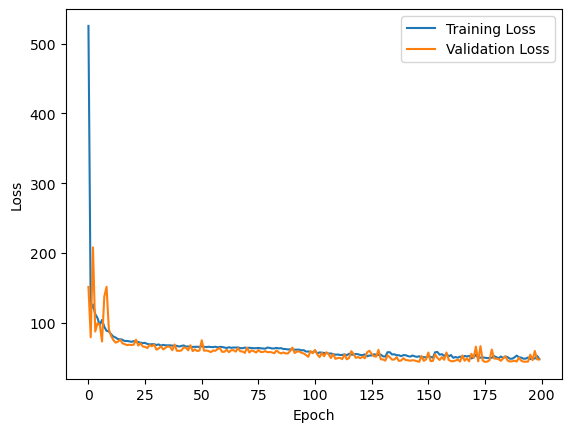

In [1113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Assuming df_selected contains features and 'runs', 'fours', 'sixes' as target variables
X_multi = df_fil.drop(['runs', 'fours', 'sixes'], axis=1)
y_multi = df_fil[['runs', 'fours', 'sixes']]

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi =train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)
# Assuming X_train is your input features and y_train_multi is a DataFrame with multiple continuous targets
# Make sure y_train_multi is normalized or preprocessed as needed
# Build the model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_multi.shape[1]))

# Add hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Add output layer with multiple nodes (one for each continuous target)
model.add(Dense(units=len(y_train_multi.columns), activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression


# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model
history = model.fit(X_train_multi, y_train_multi, epochs=200, batch_size=16, validation_split=0.25, callbacks=[early_stopping])

# Evaluate on a separate test set
test_loss = model.evaluate(X_test_multi, y_test_multi)
print(f'Test Loss: {test_loss}')

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1114]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [6904.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4344.000000],
    'team1_abbreviation': [1.000000],
    'team2_abbreviation': [2.000000],
    'batting_position': [4.000000],
    'innings_number': [2.000000],
    'age': [30.000000],
    'name': [76.000000],
    'position': [0.000000],
    'ground_name': [1.000000],
    'avgtemp_c': [26.300000],
    'maxwind_kph': [16.200000],
    'condition': [0.00000],
    'Avg_Balls_Faced': [15.50000],
    'Avg_Strike_Rate': [127.35875],
    'Total_Fifties_Mean' :[0.130],
    'Total_Hundreds_Mean':[0],
    'Total_Fifties':[4.00000],
    'Total_Hundreds':[0.00000],
    'Total_Fours_sum':[50.00000],
    'Total_Sixes_sum' :[26.00000],
    'Total_Fours_mean':[1.6875],
    'Total_Sixes_mean':[0.865625],
    'Total_runs':[640.00000],
    'Total_runs_mean':[21.37500]

}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = model.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

1/1 [==============================] - 0s 55ms/step
Model Prediction: [[15.755133    1.1949353   0.29164037]]


In [774]:
df_fil.iloc[100]

away_team_id          4346.00000
floodlit_name            0.00000
home_team_id          4342.00000
team1_abbreviation       6.00000
team2_abbreviation       5.00000
batting_position         0.00000
innings_number           1.00000
runs                     0.00000
fours                    0.00000
sixes                    0.00000
description             12.00000
age                     44.00000
name                    37.00000
position                 0.00000
ground_name             12.00000
avgtemp_c               25.30000
maxwind_kph             13.20000
Total_Fifties           16.00000
condition                6.00000
Total_Hundreds           2.00000
Avg_Balls_Faced         22.00000
Avg_Strike_Rate        129.35875
Total_Fours_mean         2.96875
Total_Sixes_mean         2.15625
Total_runs            2072.00000
Name: 100, dtype: float64

In [776]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [4340.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4342.000000],
    'team1_abbreviation': [6.000000],
    'team2_abbreviation': [7.000000],
    'batting_position': [1.000000],
    'innings_number': [1.000000],
    'description': [15.000000],
    'age': [31.000000],
    'name': [118.000000],
    'position': [8.000000],
    'ground_name': [9.000000],
    'avgtemp_c': [35.300000],
    'maxwind_kph': [20.200000],
    'Total_Fifties': [21],
    'condition': [8.00000],
    'Total_Hundreds': [3],
    'Avg_Balls_Faced': [29.826923],
    'Avg_Strike_Rate': [119.372115],
    'Total_Fours_mean':[3.615385],
    'Total_Sixes_mean':[1.750000],
    'Total_runs':[2072.192308]
}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = model.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')

1/1 [==============================] - 0s 29ms/step
Model Prediction: [[23.579931   1.981933   1.0228686]]


In [152]:
df_fil.iloc[100]

away_team_id          4340.000000
floodlit_name            1.000000
home_team_id          4342.000000
team1_abbreviation       6.000000
team2_abbreviation       7.000000
batting_position         1.000000
innings_number           1.000000
runs                    21.000000
fours                    0.000000
sixes                    3.000000
description             15.000000
age                     31.000000
name                   118.000000
position                 8.000000
ground_name              9.000000
avgtemp_c               35.600000
maxwind_kph             20.900000
Total_Fifties           21.000000
condition                8.000000
Total_Hundreds           3.000000
Avg_Balls_Faced         29.826923
Avg_Strike_Rate        119.372115
Total_Fours_mean       188.000000
Total_Sixes_mean        91.000000
Name: 100, dtype: float64

Epoch 1/250
731/731 [==============================] - 4s 5ms/step - loss: 49.7895 - val_loss: 42.6669
Epoch 2/250
731/731 [==============================] - 2s 2ms/step - loss: 49.2777 - val_loss: 43.7713
Epoch 3/250
731/731 [==============================] - 2s 2ms/step - loss: 48.5267 - val_loss: 42.9439
Epoch 4/250
731/731 [==============================] - 2s 2ms/step - loss: 49.0478 - val_loss: 42.7834
Epoch 5/250
731/731 [==============================] - 2s 3ms/step - loss: 49.7636 - val_loss: 44.8879
Epoch 6/250
731/731 [==============================] - 2s 3ms/step - loss: 50.6344 - val_loss: 42.6789
Epoch 7/250
731/731 [==============================] - 2s 3ms/step - loss: 49.6292 - val_loss: 48.1850
Epoch 8/250
731/731 [==============================] - 2s 2ms/step - loss: 49.3000 - val_loss: 42.6037
Epoch 9/250
731/731 [==============================] - 2s 3ms/step - loss: 50.1627 - val_loss: 42.3529
Epoch 10/250
731/731 [==============================] - 2s 2ms/step - los

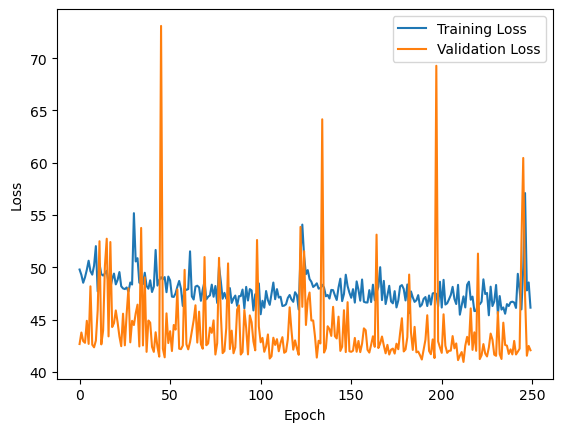

In [73]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model
history = model.fit(X_train_multi, y_train_multi, epochs=250, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on a separate test set
test_loss = model.evaluate(X_test_multi, y_test_multi)
print(f'Test Loss: {test_loss}')

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [304]:
import pandas as pd

# Create a dictionary with the values
data = {
    'away_team_id': [4340.000000],
    'floodlit_name': [1.000000],
    'home_team_id': [4342.000000],
    'team1_abbreviation': [6.000000],
    'team2_abbreviation': [7.000000],
    'batting_position': [1.000000],
    'innings_number': [1.000000],
    'description': [15.000000],
    'age': [31.000000],
    'name': [118.000000],
    'position': [8.000000],
    'ground_name': [9.000000],
    'avgtemp_c': [35.300000],
    'maxwind_kph': [20.200000],
    'condition': [8.00000],
}

# Create a DataFrame
new_observation = pd.DataFrame(data)

# Use the RandomForestRegressor for prediction
prediction = model.predict(new_observation)

# Display the prediction
print(f'Model Prediction: {prediction}')


1/1 [==============================] - 0s 76ms/step
Model Prediction: [[8.615766  0.8189455 0.2821535]]
